# Deep learing

## FNN

In [165]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout , GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam


In [114]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

In [115]:
cols = ["G" , "C" , "B" , "A" , "Ia" , "Ib" , "Ic" , "Va" , "Vb" , "Vc"] 
# Ia" , "Ib" , "Ic" , "Va" , "Vb" , "Vc is Input : features
# G , C , B , A is OutPut : labels
df = pd.read_csv("../../classData.csv")
cols[4:]
# Step 1: Encode fault combinations into single-class labels
fault_map = {
    '0000': 0,  # No Fault
    '1001': 1,  # LG
    # '0011': 2,  # LL
    '0110': 2 , # LL
    '1011': 3,  # LLG
    '0111': 4,  # LLL
    '1111': 5   # LLLG
}
df

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983
...,...,...,...,...,...,...,...,...,...,...
7856,0,0,0,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598
7857,0,0,0,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407
7858,0,0,0,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104
7859,0,0,0,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690


In [116]:
df['fault_type'] = df[['G', 'C', 'B', 'A']].astype(str).agg(''.join, axis=1)
# Map to single class label
df['fault_class'] = df['fault_type'].map(fault_map)
# Drop rows with unknown fault combinations


In [117]:
# Keep dropped rows (unknown fault types) in a separate DataFrame
df_unknown = df[~df['fault_type'].isin(fault_map.keys())].copy()

# Filter valid rows for training
df = df[df['fault_type'].isin(fault_map.keys())].copy()


In [118]:
df 

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,fault_type,fault_class
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,1001,1
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,1001,1
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,1001,1
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,1001,1
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,1001,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7856,0,0,0,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598,0000,0
7857,0,0,0,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407,0000,0
7858,0,0,0,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104,0000,0
7859,0,0,0,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690,0000,0


In [119]:
df_unknown

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,fault_type,fault_class


In [120]:
train , valid , test = np.split(df.sample(frac = 1) , [int(0.6 * len(df)) , int(0.8 * len(df))])
# train  60% |||||||||||||
# valid  20%  1234567890
# test 20%
test

c:\Users\OussamaTab\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,fault_type,fault_class
5045,1,1,1,1,669.880516,163.852298,-833.735078,0.039339,-0.033173,-0.006166,1111,5
159,1,0,0,1,312.017622,62.640263,-46.344141,-0.374911,0.461247,-0.086336,1001,1
927,1,0,0,1,-131.444684,39.223623,-49.600749,-0.365095,0.593485,-0.228390,1001,1
3437,0,1,1,1,447.988797,-893.204103,447.370989,-0.022120,-0.020094,0.042214,0111,4
7491,0,0,0,0,-45.215120,5.449328,36.794741,0.389949,-0.575036,0.185087,0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1507,1,0,1,1,-525.424590,884.206453,36.739070,0.018069,-0.010008,-0.008061,1011,3
2376,0,1,1,0,22.950219,-790.547163,770.168143,-0.180863,0.000216,0.180647,0110,2
4469,1,1,1,1,-381.393609,-516.572513,898.072615,-0.040965,0.019332,0.021633,1111,5
5146,1,1,1,1,-586.627772,865.289870,-278.664362,0.014980,0.026841,-0.041821,1111,5


In [121]:
def scale_dataset(dataFrame):
    from tensorflow.keras.utils import to_categorical
    x = dataFrame[['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']].values
    # Get the fault class values from the dataFrame parameter (not the global df)
    y = dataFrame['fault_class'].values
    
    # Scale the input features
    scaler = StandardScaler() 
    x = scaler.fit_transform(x)

    # One-hot encode the target for categorical classification
    y_cat = to_categorical(y, num_classes=7)
    
    return x, y_cat  # Return the one-hot encoded y values

In [122]:
# Re-run these steps with the fixed function
X_train, Y_train = scale_dataset(train)
X_valid, Y_valid = scale_dataset(valid)
X_test, Y_test = scale_dataset(test)

X_train

array([[-0.17647826,  0.19275744, -0.02106013,  0.26858192, -1.73516021,
         1.51364549],
       [-0.09717342,  0.31883429, -0.2689104 , -2.11914115,  0.81968752,
         1.16246214],
       [ 0.60140597,  1.40737265, -2.40523249,  0.15522997, -0.04336931,
        -0.10212948],
       ...,
       [ 0.08632018, -1.06671014,  1.13766292,  0.88975019,  0.1163328 ,
        -0.95695057],
       [-1.64980353,  1.86272567, -0.03615719,  0.01484714,  0.45680032,
        -0.47911038],
       [ 0.61390382, -1.89696479,  1.44465951, -0.08871894, -0.033779  ,
         0.11800271]])

In [123]:
X_train

array([[-0.17647826,  0.19275744, -0.02106013,  0.26858192, -1.73516021,
         1.51364549],
       [-0.09717342,  0.31883429, -0.2689104 , -2.11914115,  0.81968752,
         1.16246214],
       [ 0.60140597,  1.40737265, -2.40523249,  0.15522997, -0.04336931,
        -0.10212948],
       ...,
       [ 0.08632018, -1.06671014,  1.13766292,  0.88975019,  0.1163328 ,
        -0.95695057],
       [-1.64980353,  1.86272567, -0.03615719,  0.01484714,  0.45680032,
        -0.47911038],
       [ 0.61390382, -1.89696479,  1.44465951, -0.08871894, -0.033779  ,
         0.11800271]])

In [124]:
Y_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [125]:
# Step 6: Build the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(6,)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(7, activation='softmax')  # 7 classes for multiclass classification
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


c:\Users\OussamaTab\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [126]:
# Step 7: Train the model
# Train the model
history = model.fit(
    X_train, Y_train, 
    epochs=20, 
    batch_size=32,
    validation_data=(X_valid, Y_valid)  # Use separate validation data instead of validation_split
)

Epoch 1/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3285 - loss: 1.7400 - val_accuracy: 0.6260 - val_loss: 0.9814
Epoch 2/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6532 - loss: 0.9055 - val_accuracy: 0.7678 - val_loss: 0.5817
Epoch 3/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7524 - loss: 0.5959 - val_accuracy: 0.7990 - val_loss: 0.4664
Epoch 4/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7867 - loss: 0.4914 - val_accuracy: 0.8034 - val_loss: 0.4203
Epoch 5/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8097 - loss: 0.4276 - val_accuracy: 0.8244 - val_loss: 0.3856
Epoch 6/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8076 - loss: 0.4094 - val_accuracy: 0.8219 - val_loss: 0.3666
Epoch 7/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8251 - loss: 0.3888 - val_accuracy: 0.8244 - val_loss: 0.3500
Epoch 8/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8168 - loss: 0.3686 - val_accuracy: 0.

In [127]:
from sklearn.metrics import classification_report, confusion_matrix
# Make predictions on test data
y_pred = model.predict(X_test)

# Convert softmax probabilities to class predictions
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded test labels back to class indices for comparison
y_test_classes = np.argmax(Y_test, axis=1)

# Print evaluation metrics
print(classification_report(y_test_classes, y_pred_classes))
print(confusion_matrix(y_test_classes, y_pred_classes))

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       477
           1       0.91      0.96      0.93       225
           2       0.97      0.98      0.97       208
           3       0.99      0.95      0.97       223
           4       1.00      0.08      0.15       222
           5       0.50      0.93      0.65       218

    accuracy                           0.84      1573
   macro avg       0.89      0.81      0.78      1573
weighted avg       0.90      0.84      0.81      1573

[[477   0   0   0   0   0]
 [  9 215   0   1   0   0]
 [  2   0 203   0   0   3]
 [  0  12   0 211   0   0]
 [  1   0   3   0  18 200]
 [  0  10   4   2   0 202]]


## better Result


In [128]:
#  1. Create a deeper, more complex model
model_improved = Sequential([
    Dense(128, activation='relu', input_shape=(6,)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(7, activation='softmax')
])

c:\Users\OussamaTab\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [129]:
# 2. Use a different optimizer with a lower learning rate
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001)

# 3. Add class weights to handle class imbalance
# Calculate class weights based on class frequencies
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Get class indices from the one-hot encoded training labels
y_train_classes = np.argmax(Y_train, axis=1)

# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_classes),
    y=y_train_classes
)

# Convert to dictionary for Keras
class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}
print("Class weights:", class_weight_dict)

Class weights: {0: np.float64(0.5679190751445087), 1: np.float64(1.1441048034934498), 2: np.float64(1.3034825870646767), 3: np.float64(1.1008403361344539), 4: np.float64(1.2110939907550078), 5: np.float64(1.1575846833578793)}


In [130]:
# 4. Compile with additional metrics
model_improved.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy', 'AUC', 'Precision', 'Recall']
)

In [131]:
# 5. Use callbacks for early stopping and learning rate reduction
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

lr_reduction = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=0.00001,
    verbose=1
)

In [132]:
# 6. Train with more epochs and class weights
history = model_improved.fit(
    X_train, Y_train,
    epochs=50,  # Increase epochs, early stopping will prevent overfitting
    batch_size=32,
    validation_data=(X_valid, Y_valid),
    class_weight=class_weight_dict,  # Apply class weights
    callbacks=[early_stopping, lr_reduction],
    verbose=1
)

Epoch 1/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - AUC: 0.6969 - Precision: 0.3993 - Recall: 0.0149 - accuracy: 0.2606 - loss: 1.7535 - val_AUC: 0.9675 - val_Precision: 0.8379 - val_Recall: 0.5687 - val_accuracy: 0.7316 - val_loss: 0.7181 - learning_rate: 0.0010
Epoch 2/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.9474 - Precision: 0.7422 - Recall: 0.4924 - accuracy: 0.6539 - loss: 0.8420 - val_AUC: 0.9839 - val_Precision: 0.8923 - val_Recall: 0.6959 - val_accuracy: 0.8066 - val_loss: 0.4799 - learning_rate: 0.0010
Epoch 3/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.9685 - Precision: 0.7667 - Recall: 0.6439 - accuracy: 0.7162 - loss: 0.6238 - val_AUC: 0.9841 - val_Precision: 0.8458 - val_Recall: 0.7640 - val_accuracy: 0.7971 - val_loss: 0.4182 - learning_rate: 0.0010
Epoch 4/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.9762 - Precision: 0.8004 - Recall: 0.7166 - accuracy: 0.7627 - loss: 0.5524 - val_AUC: 0.9840 - val_Precision: 0.8149 - val_Recall: 0.7589 -

In [133]:
# 7. Evaluate the improved model
y_pred = model_improved.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(Y_test, axis=1)

print("\nImproved Model Evaluation:")
print(classification_report(y_test_classes, y_pred_classes))
print("Confusion Matrix:")
print(confusion_matrix(y_test_classes, y_pred_classes))

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

Improved Model Evaluation:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       477
           1       0.93      1.00      0.96       225
           2       1.00      0.97      0.98       208
           3       1.00      0.92      0.96       223
           4       0.53      0.40      0.45       222
           5       0.49      0.62      0.55       218

    accuracy                           0.85      1573
   macro avg       0.82      0.82      0.82      1573
weighted avg       0.85      0.85      0.84      1573

Confusion Matrix:
[[477   0   0   0   0   0]
 [  0 224   0   1   0   0]
 [  4   0 201   0   3   0]
 [  0   9   0 205   0   9]
 [  1   0   0   0  88 133]
 [  0   8   0   0  74 136]]


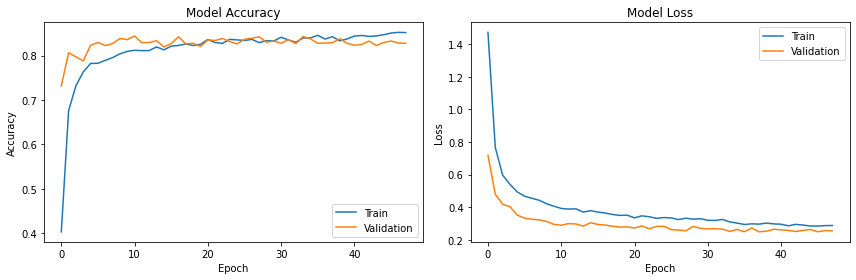

In [134]:
# 8. Visualize training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.tight_layout()
plt.show()

In [135]:
# 1. SMOTE: Synthetic Minority Over-sampling Technique
# This will help with the class imbalance problem, particularly for class 6
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

def apply_smote_balancing():
    # Get the class indices from one-hot encoded labels
    y_train_classes = np.argmax(Y_train, axis=1)
    
    # Apply SMOTE to generate synthetic samples for minority classes
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train_classes)
    
    # Convert back to one-hot encoding
    from tensorflow.keras.utils import to_categorical
    y_resampled_cat = to_categorical(y_resampled, num_classes=7)
    
    print(f"Original shape: {X_train.shape}, Resampled shape: {X_resampled.shape}")
    print("Class distribution before SMOTE:", np.bincount(y_train_classes))
    print("Class distribution after SMOTE:", np.bincount(y_resampled))
    
    return X_resampled, y_resampled_cat


In [136]:

# 2. Focal Loss - To focus more on hard-to-classify examples like class 6
import tensorflow as tf
from tensorflow.keras import backend as K

def focal_loss(gamma=2., alpha=.25):
    def focal_loss_fixed(y_true, y_pred):
        pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
        pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
        
        epsilon = K.epsilon()
        pt_1 = K.clip(pt_1, epsilon, 1. - epsilon)
        pt_0 = K.clip(pt_0, epsilon, 1. - epsilon)
        
        return -K.mean(alpha * K.pow(1. - pt_1, gamma) * K.log(pt_1)) - \
               K.mean((1 - alpha) * K.pow(pt_0, gamma) * K.log(1. - pt_0))
    return focal_loss_fixed


In [137]:

# 3. Feature importance analysis and selection
from sklearn.feature_selection import SelectKBest, f_classif

def analyze_feature_importance(X, y, feature_names=None):
    # Convert one-hot encoded labels to class indices if needed
    if len(y.shape) > 1 and y.shape[1] > 1:
        y = np.argmax(y, axis=1)
    
    # Select k best features
    selector = SelectKBest(f_classif, k='all')
    selector.fit(X, y)
    
    # Get scores
    scores = selector.scores_
    
    # If feature names are provided, display them with scores
    if feature_names is None:
        feature_names = [f"Feature {i}" for i in range(X.shape[1])]
    
    # Create dataframe of features and their scores
    import pandas as pd
    feature_scores = pd.DataFrame({
        'Feature': feature_names,
        'Score': scores
    })
    
    # Sort by score
    feature_scores = feature_scores.sort_values('Score', ascending=False)
    print(feature_scores)
    
    return feature_scores, selector


In [138]:

# 4. Advanced model with attention mechanism
from tensorflow.keras.layers import Layer, Dense, Dropout, InputSpec, Input
from tensorflow.keras.models import Model

class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)
    
    def build(self, input_shape):
        self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], 1),
                                 initializer="normal")
        self.b = self.add_weight(name="att_bias", shape=(input_shape[1], 1),
                                 initializer="zeros")
        super(AttentionLayer, self).build(input_shape)
    
    def call(self, x):
        et = K.squeeze(K.tanh(K.dot(x, self.W) + self.b), axis=-1)
        at = K.softmax(et)
        at = K.expand_dims(at, axis=-1)
        output = x * at
        return K.sum(output, axis=1)
    
    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[-1])

def create_attention_model(input_shape):
    inputs = Input(shape=(input_shape,))
    
    # First dense block
    x = Dense(128, activation='relu')(inputs)
    x = Dropout(0.3)(x)
    
    # Reshape for attention
    reshaped = tf.keras.layers.Reshape((4, 32))(x)
    
    # Apply attention
    attention_output = AttentionLayer()(reshaped)
    
    # Additional dense layers
    x = Dense(64, activation='relu')(attention_output)
    x = Dropout(0.3)(x)
    
    # Output layer
    outputs = Dense(7, activation='softmax')(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss=focal_loss(gamma=2.0, alpha=0.25),
        metrics=['accuracy', 'AUC', 'Precision', 'Recall']
    )
    
    return model


In [139]:

# 5. Hard example mining - focus training on the hardest examples
def train_with_hard_example_mining(model, X_train, Y_train, X_valid, Y_valid, epochs=50):
    batch_size = 32
    n_samples = X_train.shape[0]
    n_batches = n_samples // batch_size
    
    for epoch in range(epochs):
        print(f"Epoch {epoch+1}/{epochs}")
        
        # Calculate loss for each sample
        sample_losses = []
        for i in range(n_samples):
            x_sample = X_train[i:i+1]
            y_sample = Y_train[i:i+1]
            loss = model.test_on_batch(x_sample, y_sample)[0]
            sample_losses.append((i, loss))
        
        # Sort samples by loss (hardest examples first)
        sample_losses.sort(key=lambda x: x[1], reverse=True)
        
        # Take the top 50% hardest examples
        hard_indices = [x[0] for x in sample_losses[:n_samples//2]]
        
        # Train on hard examples
        X_hard = X_train[hard_indices]
        Y_hard = Y_train[hard_indices]
        
        model.fit(
            X_hard, Y_hard,
            epochs=1,
            batch_size=batch_size,
            verbose=0
        )
        
        # Evaluate on validation set
        val_loss, val_acc = model.evaluate(X_valid, Y_valid, verbose=0)
        print(f"Validation loss: {val_loss:.4f}, accuracy: {val_acc:.4f}")
    
    return model


In [140]:

# 6. Multi-stage training: First train on all data, then fine-tune on problem classes
def multi_stage_training():
    # First stage: Train on all data
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(7, activation='softmax')
    ])
    
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    model.fit(
        X_train, Y_train,
        epochs=25,
        batch_size=32,
        validation_data=(X_valid, Y_valid),
        verbose=0
    )
    
    # Second stage: Focus on problem classes (5 and 6)
    y_train_classes = np.argmax(Y_train, axis=1)
    problem_indices = np.where((y_train_classes == 5) | (y_train_classes == 6))[0]
    
    # Also include some samples from other classes to prevent forgetting
    other_indices = np.where((y_train_classes != 5) & (y_train_classes != 6))[0]
    np.random.shuffle(other_indices)
    selected_other = other_indices[:len(problem_indices)]
    
    fine_tune_indices = np.concatenate([problem_indices, selected_other])
    X_fine_tune = X_train[fine_tune_indices]
    Y_fine_tune = Y_train[fine_tune_indices]
    
    # Fine-tune with a very low learning rate
    model.compile(
        optimizer=Adam(learning_rate=0.0001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    model.fit(
        X_fine_tune, Y_fine_tune,
        epochs=15,
        batch_size=32,
        validation_data=(X_valid, Y_valid),
        verbose=0
    )
    
    return model


In [141]:

# 7. Custom Metrics for Class 6
class ClassSixRecall(tf.keras.metrics.Metric):
    def __init__(self, name='class_six_recall', **kwargs):
        super(ClassSixRecall, self).__init__(name=name, **kwargs)
        self.true_positives = self.add_weight(name='tp', initializer='zeros')
        self.false_negatives = self.add_weight(name='fn', initializer='zeros')
    
    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.argmax(y_true, axis=1)
        y_pred = tf.argmax(y_pred, axis=1)
        
        # Find class 6 samples
        mask = tf.equal(y_true, 6)
        
        # Calculate true positives for class 6
        tp = tf.cast(tf.logical_and(mask, tf.equal(y_pred, 6)), tf.float32)
        self.true_positives.assign_add(tf.reduce_sum(tp))
        
        # Calculate false negatives for class 6
        fn = tf.cast(tf.logical_and(mask, tf.not_equal(y_pred, 6)), tf.float32)
        self.false_negatives.assign_add(tf.reduce_sum(fn))
    
    def result(self):
        return self.true_positives / (self.true_positives + self.false_negatives + K.epsilon())
    
    def reset_state(self):
        self.true_positives.assign(0)
        self.false_negatives.assign(0)


In [142]:

# 8. Decision boundary analysis for classes 5 and 6
def analyze_decision_boundaries():
    from sklearn.manifold import TSNE
    import matplotlib.pyplot as plt
    
    # Get predictions
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(Y_test, axis=1)
    
    # Find misclassifications between classes 5 and 6
    misclassified = []
    for i in range(len(y_test_classes)):
        if (y_test_classes[i] == 6 and y_pred_classes[i] == 5) or \
           (y_test_classes[i] == 5 and y_pred_classes[i] == 6):
            misclassified.append(i)
    
    # Get class 5 and 6 indices
    class5_indices = np.where(y_test_classes == 5)[0]
    class6_indices = np.where(y_test_classes == 6)[0]
    
    # Combine indices
    analysis_indices = np.concatenate([class5_indices, class6_indices])
    
    # Get features and labels for analysis
    X_analysis = X_test[analysis_indices]
    y_analysis = y_test_classes[analysis_indices]
    
    # Apply t-SNE for dimensionality reduction
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X_analysis)
    
    # Plot
    plt.figure(figsize=(10, 8))
    for i, c in zip([5, 6], ['blue', 'red']):
        idx = np.where(y_analysis == i)
        plt.scatter(X_tsne[idx, 0], X_tsne[idx, 1], c=c, label=f'Class {i}')
    
    # Highlight misclassified points
    mis_idx = [list(analysis_indices).index(i) for i in misclassified if i in analysis_indices]
    plt.scatter(X_tsne[mis_idx, 0], X_tsne[mis_idx, 1], c='yellow', marker='x', s=100, label='Misclassified')
    
    plt.legend()
    plt.title('t-SNE visualization of classes 5 and 6')
    plt.show()
    
    return X_analysis, y_analysis, misclassified

# Example of how to use these methods:
# 1. First, balance the training data with SMOTE
X_resampled, Y_resampled = apply_smote_balancing()

# 2. Train an advanced model with balanced data and focal loss
input_shape = X_resampled.shape[1]
advanced_model = create_attention_model(input_shape)

# 3. Train with early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

history = advanced_model.fit(
    X_resampled, Y_resampled,
    epochs=50,
    batch_size=32,
    validation_data=(X_valid, Y_valid),
    callbacks=[early_stopping, lr_reduction],
    verbose=1
)


Original shape: (4716, 6), Resampled shape: (8304, 6)
Class distribution before SMOTE: [1384  687  603  714  649  679]
Class distribution after SMOTE: [1384 1384 1384 1384 1384 1384]
Epoch 1/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - AUC: 0.7508 - Precision: 0.4809 - Recall: 0.0083 - accuracy: 0.3296 - loss: 0.0440 - val_AUC: 0.9647 - val_Precision: 1.0000 - val_Recall: 0.2462 - val_accuracy: 0.7608 - val_loss: 0.0180 - learning_rate: 0.0010
Epoch 2/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - AUC: 0.9447 - Precision: 0.8867 - Recall: 0.2384 - accuracy: 0.6523 - loss: 0.0211 - val_AUC: 0.9793 - val_Precision: 1.0000 - val_Recall: 0.4784 - val_accuracy: 0.8003 - val_loss: 0.0134 - learning_rate: 0.0010
Epoch 3/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - AUC: 0.9641 - Precision: 0.9049 - Recall: 0.4068 - accuracy: 0.7126 - loss: 0.0170 - val_AUC: 0.9829 - val_Precision: 0.9908 - val_Recall: 0.5471 - val_accuracy: 0.8225 - val_loss: 0.0120 - learning_rate: 0.0010
Epoch 4/50
260/260

In [143]:

# 4. Evaluate the advanced model
y_pred = advanced_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(Y_test, axis=1)

print("\nAdvanced Model Evaluation:")
print(classification_report(y_test_classes, y_pred_classes))
print("Confusion Matrix:")
print(confusion_matrix(y_test_classes, y_pred_classes))

50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

Advanced Model Evaluation:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       477
           1       0.97      0.99      0.98       225
           2       1.00      0.99      0.99       208
           3       0.99      0.96      0.97       223
           4       0.58      0.23      0.33       222
           5       0.51      0.83      0.63       218

    accuracy                           0.86      1573
   macro avg       0.84      0.83      0.82      1573
weighted avg       0.87      0.86      0.85      1573

Confusion Matrix:
[[477   0   0   0   0   0]
 [  0 223   0   2   0   0]
 [  2   0 206   0   0   0]
 [  0   7   0 214   0   2]
 [  1   0   0   0  52 169]
 [  0   0   1   0  37 180]]


In [147]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(6,)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(7, activation='softmax')
])


c:\Users\OussamaTab\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [149]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


In [151]:
history = model.fit(
    X_train, Y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_valid, Y_valid)
)
from sklearn.metrics import classification_report, confusion_matrix

# Predict classes
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  # if one-hot encoded
y_true = Y_test.argmax(axis=1)          # or just use Y_test if sparse

print(classification_report(y_true, y_pred_classes))

Epoch 1/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4702 - loss: 1.3425 - val_accuracy: 0.7010 - val_loss: 0.7884
Epoch 2/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6812 - loss: 0.7905 - val_accuracy: 0.7901 - val_loss: 0.5512
Epoch 3/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7586 - loss: 0.5808 - val_accuracy: 0.7990 - val_loss: 0.4639
Epoch 4/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7866 - loss: 0.4819 - val_accuracy: 0.7945 - val_loss: 0.4226
Epoch 5/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7893 - loss: 0.4498 - val_accuracy: 0.8111 - val_loss: 0.3899
Epoch 6/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8003 - loss: 0.4260 - val_accuracy: 0.8225 - val_loss: 0.3655
Epoch 7/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8102 - loss: 0.4008 - val_accuracy: 0.8187 - val_loss: 0.3570
Epoch 8/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8171 - loss: 0.3761 - val_accuracy: 0.

In [152]:
model = Sequential([
    Conv1D(64, 3, activation='relu', input_shape=(6, 1)),  # Use Conv2D for images
    MaxPooling1D(2),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(7, activation='softmax')
])


c:\Users\OussamaTab\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [153]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


In [154]:
history = model.fit(
    X_train, Y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_valid, Y_valid)
)
from sklearn.metrics import classification_report, confusion_matrix

# Predict classes
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  # if one-hot encoded
y_true = Y_test.argmax(axis=1)          # or just use Y_test if sparse

print(classification_report(y_true, y_pred_classes))

Epoch 1/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.3848 - loss: 1.5395 - val_accuracy: 0.6501 - val_loss: 0.8128
Epoch 2/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6729 - loss: 0.7700 - val_accuracy: 0.7029 - val_loss: 0.6288
Epoch 3/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.7276 - loss: 0.6068 - val_accuracy: 0.7583 - val_loss: 0.5357
Epoch 4/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7620 - loss: 0.5201 - val_accuracy: 0.7697 - val_loss: 0.4872
Epoch 5/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7591 - loss: 0.4895 - val_accuracy: 0.7761 - val_loss: 0.4558
Epoch 6/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7866 - loss: 0.4346 - val_accuracy: 0.7945 - val_loss: 0.4389
Epoch 7/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8011 - loss: 0.4212 - val_accuracy: 0.7882 - val_loss: 0.4160
Epoch 8/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.7987 - loss: 0.3927 - val_accura

In [155]:
from keras.layers import LSTM, GRU
# For time series data:
# X_train.shape == (samples, timesteps, features)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_valid = X_valid.reshape((X_valid.shape[0], X_valid.shape[1], 1))
timesteps = X_train.shape[1]
features = X_train.shape[2]

In [156]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


In [157]:
history = model.fit(
    X_train, Y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_valid, Y_valid)
)
from sklearn.metrics import classification_report, confusion_matrix

# Predict classes
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  # if one-hot encoded
y_true = Y_test.argmax(axis=1)          # or just use Y_test if sparse

print(classification_report(y_true, y_pred_classes))

Epoch 1/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8322 - loss: 0.3022 - val_accuracy: 0.8282 - val_loss: 0.3070
Epoch 2/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8396 - loss: 0.3000 - val_accuracy: 0.8232 - val_loss: 0.3175
Epoch 3/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8315 - loss: 0.3085 - val_accuracy: 0.8314 - val_loss: 0.3099
Epoch 4/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8402 - loss: 0.3019 - val_accuracy: 0.8289 - val_loss: 0.3137
Epoch 5/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8418 - loss: 0.2851 - val_accuracy: 0.8308 - val_loss: 0.3064
Epoch 6/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8228 - loss: 0.2952 - val_accuracy: 0.8295 - val_loss: 0.2975
Epoch 7/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8377 - loss: 0.2866 - val_accuracy: 0.8314 - val_loss: 0.3032
Epoch 8/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8418 - loss: 0.2774 - val_accuracy: 0

In [158]:
model = Sequential([
    LSTM(64, input_shape=(timesteps, features)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(7, activation='softmax')
])


c:\Users\OussamaTab\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [159]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


In [160]:
history = model.fit(
    X_train, Y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_valid, Y_valid)
)
from sklearn.metrics import classification_report, confusion_matrix

# Predict classes
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  # if one-hot encoded
y_true = Y_test.argmax(axis=1)          # or just use Y_test if sparse

print(classification_report(y_true, y_pred_classes))

Epoch 1/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.3048 - loss: 1.8368 - val_accuracy: 0.5649 - val_loss: 1.1127
Epoch 2/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5765 - loss: 0.9865 - val_accuracy: 0.6947 - val_loss: 0.6440
Epoch 3/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6853 - loss: 0.6764 - val_accuracy: 0.7487 - val_loss: 0.5195
Epoch 4/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7372 - loss: 0.5616 - val_accuracy: 0.7780 - val_loss: 0.4492
Epoch 5/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7499 - loss: 0.4997 - val_accuracy: 0.7958 - val_loss: 0.4219
Epoch 6/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7736 - loss: 0.4520 - val_accuracy: 0.7926 - val_loss: 0.4153
Epoch 7/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7926 - loss: 0.4215 - val_accuracy: 0.7990 - val_loss: 0.3952
Epoch 8/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.7930 - loss: 0.4030 - val_accu

In [161]:
model = Sequential([
    GRU(64, input_shape=(timesteps, features)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(7, activation='softmax')
])


c:\Users\OussamaTab\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [162]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


In [163]:
history = model.fit(
    X_train, Y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_valid, Y_valid)
)
from sklearn.metrics import classification_report, confusion_matrix

# Predict classes
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  # if one-hot encoded
y_true = Y_test.argmax(axis=1)          # or just use Y_test if sparse

print(classification_report(y_true, y_pred_classes))

Epoch 1/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.2833 - loss: 1.8023 - val_accuracy: 0.6380 - val_loss: 0.9319
Epoch 2/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6458 - loss: 0.8202 - val_accuracy: 0.7551 - val_loss: 0.5484
Epoch 3/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7440 - loss: 0.5450 - val_accuracy: 0.7863 - val_loss: 0.4555
Epoch 4/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7730 - loss: 0.4775 - val_accuracy: 0.7856 - val_loss: 0.4251
Epoch 5/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.7839 - loss: 0.4177 - val_accuracy: 0.8003 - val_loss: 0.3698
Epoch 6/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.7874 - loss: 0.4043 - val_accuracy: 0.8193 - val_loss: 0.3481
Epoch 7/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7934 - loss: 0.3917 - val_accuracy: 0.8149 - val_loss: 0.3295
Epoch 8/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.8177 - loss: 0.3419 - val_accura

In [167]:
model = Sequential([
    Conv1D(128, 3, activation='relu', padding='same', input_shape=(6, 1)),  # Short sequences, so kernel=3
    MaxPooling1D(2),
    Conv1D(64, 3, activation='relu', padding='same'),
    GlobalAveragePooling1D(),
    Dense(7, activation='softmax')
])


In [168]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


In [169]:
history = model.fit(
    X_train, Y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_valid, Y_valid)
)
from sklearn.metrics import classification_report, confusion_matrix

# Predict classes
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  # if one-hot encoded
y_true = Y_test.argmax(axis=1)          # or just use Y_test if sparse

print(classification_report(y_true, y_pred_classes))

Epoch 1/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.3837 - loss: 1.5865 - val_accuracy: 0.6781 - val_loss: 0.8254
Epoch 2/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7032 - loss: 0.7560 - val_accuracy: 0.7627 - val_loss: 0.5964
Epoch 3/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7649 - loss: 0.5721 - val_accuracy: 0.7850 - val_loss: 0.5076
Epoch 4/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7782 - loss: 0.4995 - val_accuracy: 0.7780 - val_loss: 0.4476
Epoch 5/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7796 - loss: 0.4613 - val_accuracy: 0.8028 - val_loss: 0.4341
Epoch 6/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7966 - loss: 0.4179 - val_accuracy: 0.8073 - val_loss: 0.4003
Epoch 7/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8131 - loss: 0.4001 - val_accuracy: 0.8149 - val_loss: 0.4044
Epoch 8/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8089 - loss: 0.4004 - val_accur